**Data Dictionary**

<font color='blue'><b>- enrolldt : Enrollment Date <br>
<font color='blue'><b>- price: Membership price <br>
<font color='blue'><b>- downpmt: Downpayment <br>
<font color='blue'><b>- monthdue: Months Due <br>
<font color='blue'><b>- pmttype: Payment Type (1: Credit Card, 3: Cash , 4: Check, 5: Debit Card) <br>
<font color='blue'><b>- use: Usage <br>
<font color='blue'><b>- age: Age of customer <br>
<font color='blue'><b>- gender: Gender of customer(1: Male, 2: Female) <br>
<font color='blue'><b>- default: 1: Default, 0 Non-Default <br>

**Importing basic libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Read data**

In [2]:


df = pd.read_csv('Verizon Data.csv')

### 1. Getting familiar with the data

**Peak the data frame**

In [3]:
df.head()

,year,month,day,price,downpmt,monthdue,payment_left,monthly_payment,pmttype,credit_score,age,gender,default
0,2020,1,12,2178.85,250.00,6.0,1928.85,321.475000,4,1,0,2,0
1,2020,6,15,1543.65,1543.65,6.0,0.00,0.000000,1,0,0,2,0
2,2020,4,19,1107.67,125.00,5.0,982.67,196.534000,1,0,0,2,0
3,2020,3,17,950.44,237.61,9.0,712.83,79.203333,5,0,0,1,0
4,2020,8,21,1436.00,250.00,9.0,1186.00,131.777778,3,0,0,2,0


**Data frame info**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24833 entries, 0 to 24832
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             24833 non-null  int64  
 1   month            24833 non-null  int64  
 2   day              24833 non-null  int64  
 3   price            24833 non-null  float64
 4   downpmt          24833 non-null  float64
 5   monthdue         24833 non-null  float64
 6   payment_left     24833 non-null  float64
 7   monthly_payment  24833 non-null  float64
 8   pmttype          24833 non-null  int64  
 9   credit_score     24833 non-null  int64  
 10  age              24833 non-null  int64  
 11  gender           24833 non-null  int64  
 12  default          24833 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 2.5 MB


**Basic stats descriptive statistics (mean, median, min, max, standard deviation) for each field**

In [5]:
df.describe()

,year,month,day,price,downpmt,monthdue,payment_left,monthly_payment,pmttype,credit_score,age,gender,default
count,24833.000000,24833.000000,24833.000000,24833.000000,24833.000000,24833.000000,24833.000000,24833.000000,24833.000000,24833.000000,24833.000000,24833.000000,24833.000000
mean,2020.601377,6.499013,13.041397,1003.756083,199.799561,8.288312,803.956522,144.342202,3.093223,1.944952,29.199372,1.498087,0.115049
std,0.489625,3.458227,7.169510,439.278060,335.465403,7.109477,472.899790,190.091249,1.559949,2.315778,13.278939,0.500006,0.319087
min,2020.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,2020.000000,3.000000,7.000000,699.000000,49.000000,5.500000,536.820000,61.451579,1.000000,0.000000,22.000000,1.000000,0.000000
50%,2021.000000,6.000000,13.000000,999.000000,100.000000,6.000000,855.000000,116.941176,3.000000,1.000000,28.000000,1.000000,0.000000
75%,2021.000000,10.000000,19.000000,1249.000000,175.000000,9.000000,1116.880000,184.907273,4.000000,3.000000,36.000000,2.000000,0.000000
max,2021.000000,12.000000,25.000000,9371.250000,9371.250000,120.000000,5045.000000,19639.750000,5.000000,8.000000,99.000000,2.000000,1.000000


**Check for missing values**

<Axes: >

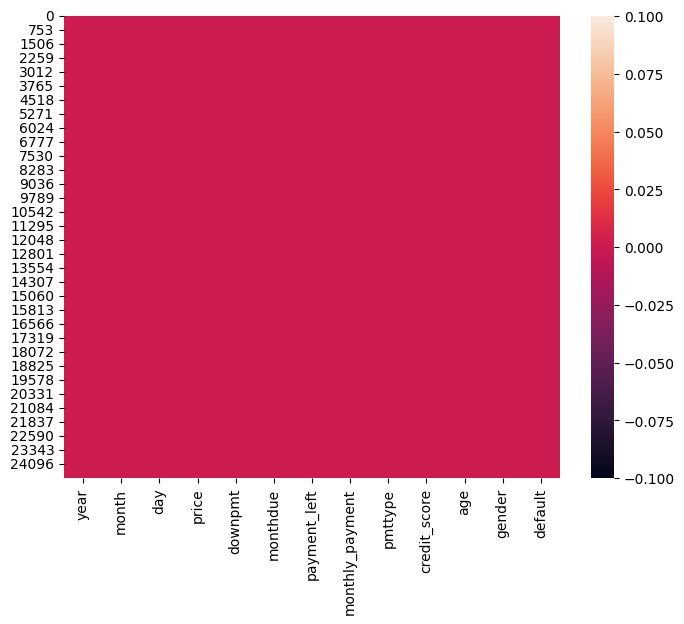

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull())

<font color='red'><b> What is your initial take on the dataset and it's completeness?

### 2. Exploratory Data Analysis

**Check out how many people defaulted**

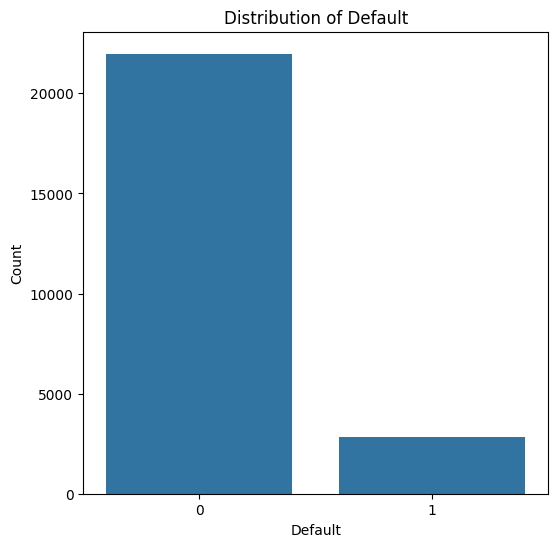

In [7]:
# Check the distribution of default
plt.figure(figsize=(6,6))
sns.countplot(x='default', data=df)
plt.xlabel('Default')
plt.ylabel('Count')
plt.title("Distribution of Default")
plt.show()

**Default by gender**

In [8]:
sns.__version__

'0.13.2'

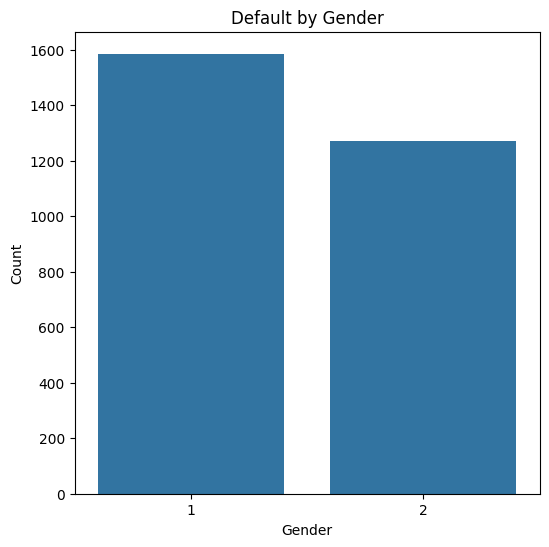

In [9]:
# Check default by gender
plt.figure(figsize=(6,6))
df_default = df[df['default'] == 1]
sns.countplot(x='gender', data=df_default)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title("Default by Gender")
plt.show()

**Default by payment type**

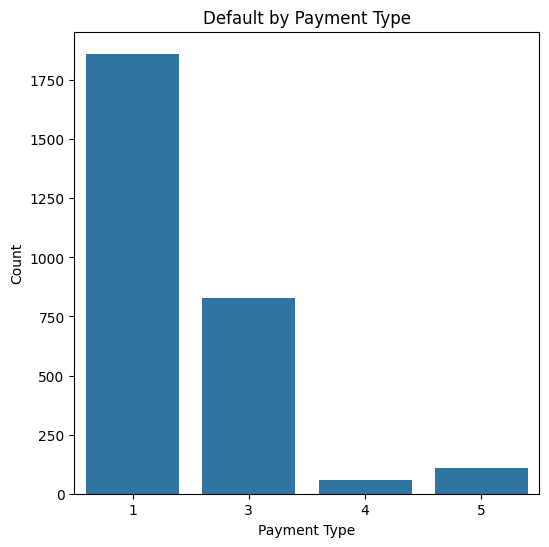

In [10]:
# Check default by payment type
plt.figure(figsize=(6,6))
sns.countplot(x='pmttype', data=df_default)
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.title("Default by Payment Type")
plt.show()

In [11]:
# Identifying outliers using IQR for specific columns
for column in ['price', 'downpmt', 'age']:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    # Filtering out outliers
    df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]

**Default by age**

Text(0, 0.5, 'Count')

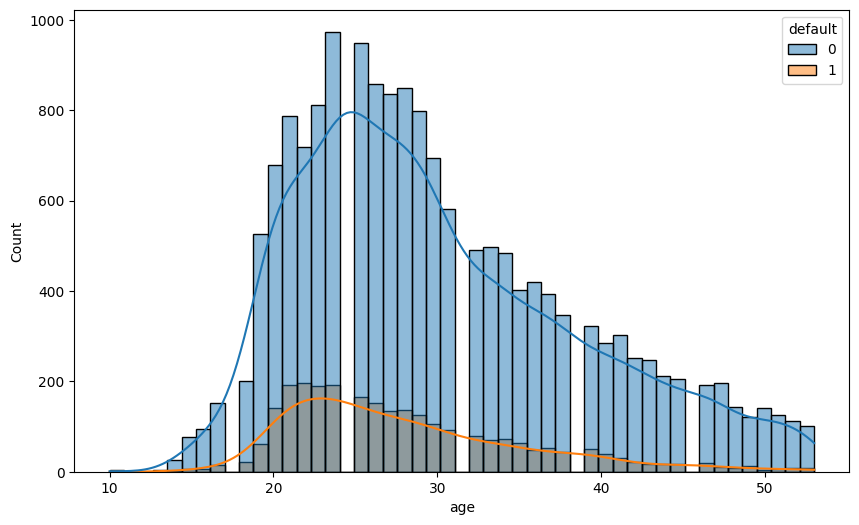

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(data = df, x = "age", kde = True, hue = "default")
plt.xlabel('age')
plt.ylabel('Count')

**Default by down payment**

Text(0, 0.5, 'Count')

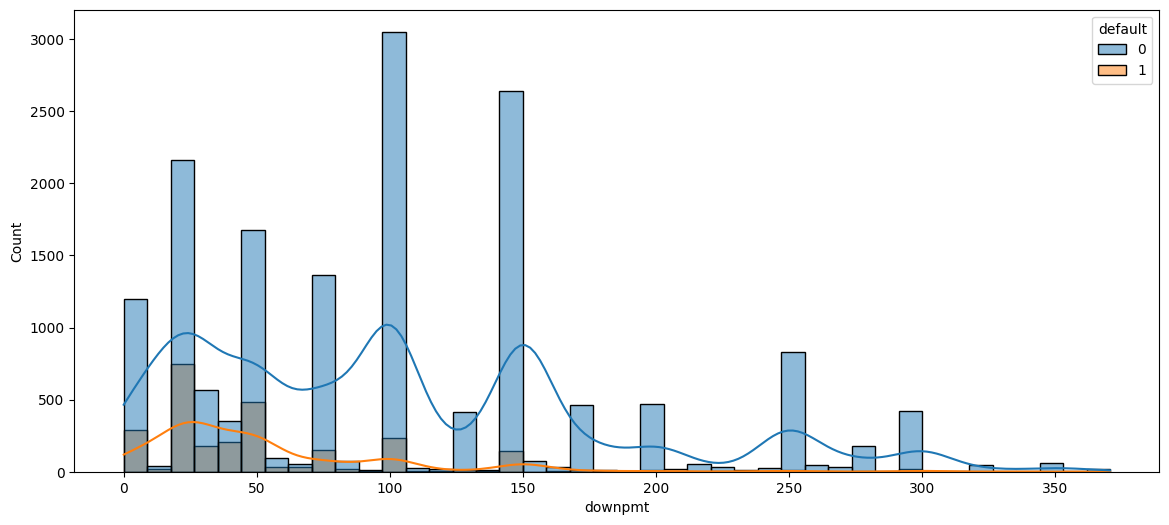

In [13]:
plt.figure(figsize=(14,6))
sns.histplot(data = df, x = "downpmt", kde = True, hue = "default")
plt.xlabel('downpmt')
plt.ylabel('Count')

**Default by credit score**

Text(0, 0.5, 'Count')

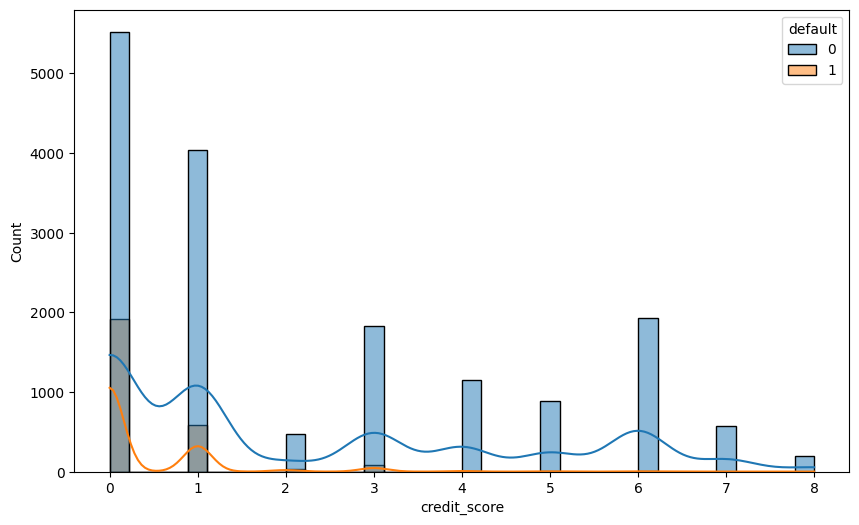

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(data = df, x = "credit_score", kde = True, hue = "default")
plt.xlabel('credit_score')
plt.ylabel('Count')

**Default by price**

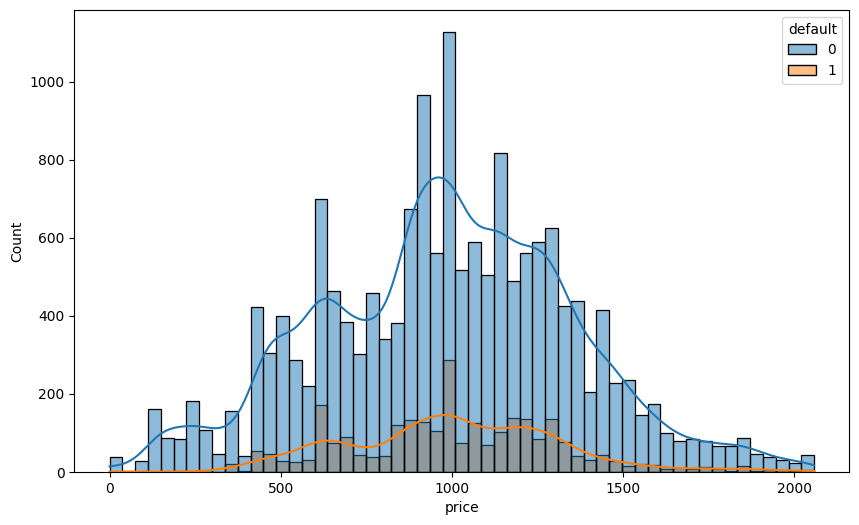

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(data = df, x = "price", kde = True, hue = "default")
plt.xlabel('price')
plt.ylabel('Count')
plt.show()

<font color='red'><b>See if any columns have outliers. Try removing them and making EDA plots again

### Redo abpve

<font color='red'><b>Can you identify certain individuals that tend to default more than others based on the above EDA?

### These trends suggest that young age and credit payments may be stronger indicators of default.

<font color='red'><b>What other EDA's can you think of doing? Try 1 or 2 below.

## Extra EDA

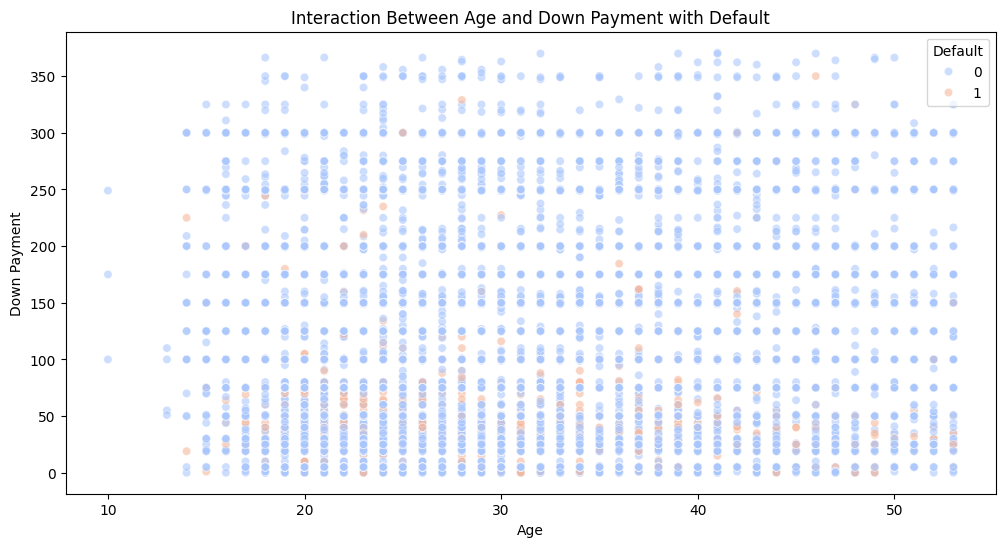

In [16]:
# Age vs. Down Payment
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='age', y='downpmt', hue='default', palette='coolwarm', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Down Payment')
plt.title("Interaction Between Age and Down Payment with Default")
plt.legend(title='Default', loc='upper right')
plt.show()


**Plotting distributions and correlations. This will tell you quickly where data is distributed normally/not normally and whether some of your variables are balanced or not.**

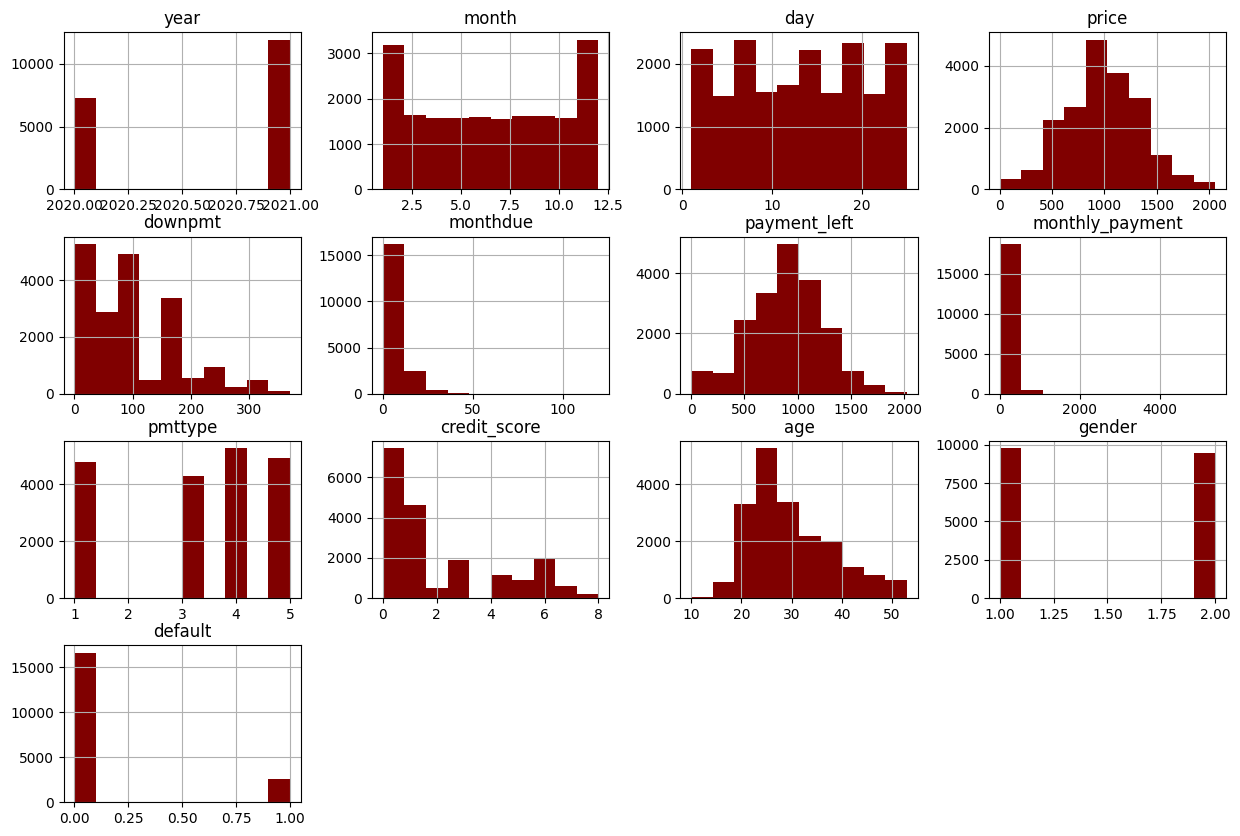

In [17]:
fig = plt.figure(figsize = (15, 10));
ax = fig.gca();
df.hist(ax = ax, color = 'maroon')
pass

**Check out correlation between the variables**

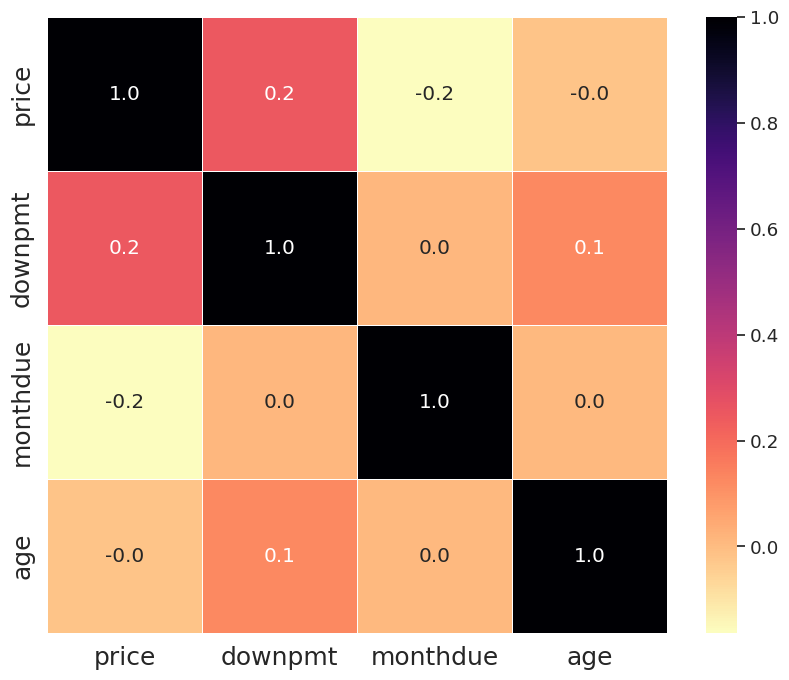

In [18]:
sns.set(font_scale = 1.2)
f, ax = plt.subplots(figsize = (10, 8))
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 18)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 18)
sns.heatmap(df[['price', 'downpmt', 'monthdue', 'age']].corr(), annot = True,
            linewidths = 0.5, fmt = '.1f', ax = ax, cmap = 'magma_r')
pass

<font color='red'><b>Are you able to identify correlations between different features based on the above?

## There is a moderate relationship between price and down payment, but the other correlations are weak. This suggests that price and down payment may influence each other more than the other features do.

### 3. Splitting features and target variable

In [19]:
df.columns

Index(['year', 'month', 'day', 'price', 'downpmt', 'monthdue', 'payment_left',
       'monthly_payment', 'pmttype', 'credit_score', 'age', 'gender',
       'default'],
      dtype='object')

In [20]:
X = df.drop(columns=['default'])

In [21]:
y = df['default']

### 4. Split into train test set

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

### 5. Feature Standardization

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 6. Modeling

**Since we have the target class, let's implement some supervised learning algorithms**

**Logistic Regression**

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [26]:
print("\nConfusion Matrix for Logistic Regression Model:\n\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report for Logistic Regression Model:\n\n", classification_report(y_test, y_pred_lr))


Confusion Matrix for Logistic Regression Model:

 [[6381  254]
 [ 554  509]]

Classification Report for Logistic Regression Model:

               precision    recall  f1-score   support

           0       0.92      0.96      0.94      6635
           1       0.67      0.48      0.56      1063

    accuracy                           0.90      7698
   macro avg       0.79      0.72      0.75      7698
weighted avg       0.89      0.90      0.89      7698



**Random Forest**

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [28]:
print("\nConfusion Matrix for Random Forest Model:\n\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report for Random Forest Model:\n\n", classification_report(y_test, y_pred_rf))


Confusion Matrix for Random Forest Model:

 [[6405  230]
 [ 522  541]]

Classification Report for Random Forest Model:

               precision    recall  f1-score   support

           0       0.92      0.97      0.94      6635
           1       0.70      0.51      0.59      1063

    accuracy                           0.90      7698
   macro avg       0.81      0.74      0.77      7698
weighted avg       0.89      0.90      0.90      7698



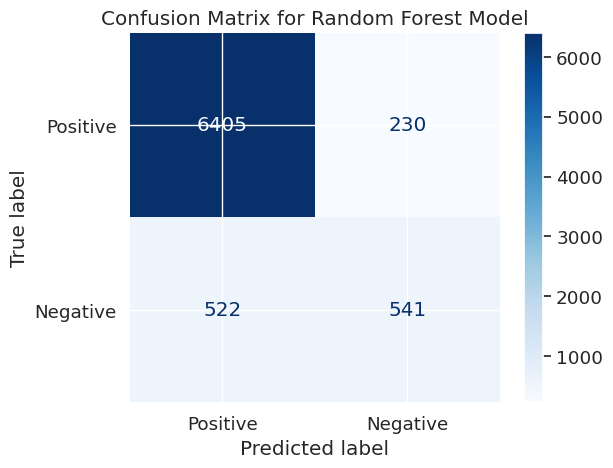

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix without the grid and default text
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive", "Negative"])
disp.plot(cmap=plt.cm.Blues, colorbar=True, values_format='')

plt.title("Confusion Matrix for Random Forest Model")

# Remove grid lines by setting linewidth to zero
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()


## Decision tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Generate and print the confusion matrix and classification report
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix for Decision Tree Model:\n", conf_matrix_dt)
print("\nClassification Report for Decision Tree Model:\n", classification_report(y_test, y_pred_dt))


Confusion Matrix for Decision Tree Model:
 [[6111  524]
 [ 515  548]]

Classification Report for Decision Tree Model:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      6635
           1       0.51      0.52      0.51      1063

    accuracy                           0.87      7698
   macro avg       0.72      0.72      0.72      7698
weighted avg       0.87      0.87      0.87      7698



<font color='red'><b> We have used Logistic Regression, Decision Tree and Random Forest to predict if a customer will default or not. Try 2 other models of your choice and evaluate them on 2 metrics of your choice that we haven't used so far

## Linear regression

In [31]:
from sklearn.linear_model import LinearRegression, PoissonRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
# Fit Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

# Evaluate Linear Regression Model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression - Mean Squared Error: {mse_linear:.2f}, R^2 Score: {r2_linear:.2f}")

Linear Regression - Mean Squared Error: 0.09, R^2 Score: 0.26


In [33]:
# Define a threshold to classify predictions
threshold = 0.5

# Binarize predictions from Linear Regression and Poisson Regression
y_pred_linear_binary = (y_pred_linear >= threshold).astype(int)

print("\nConfusion Matrix for Linear Regression Model:\n\n", confusion_matrix(y_test, y_pred_linear_binary))
print("\nClassification Report for Linear Regression Model:\n\n", classification_report(y_test, y_pred_linear_binary))


Confusion Matrix for Linear Regression Model:

 [[6632    3]
 [1048   15]]

Classification Report for Linear Regression Model:

               precision    recall  f1-score   support

           0       0.86      1.00      0.93      6635
           1       0.83      0.01      0.03      1063

    accuracy                           0.86      7698
   macro avg       0.85      0.51      0.48      7698
weighted avg       0.86      0.86      0.80      7698



## KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # n_neighbors is typically set to an odd number
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test_scaled)

# Generate and print the confusion matrix and classification report
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("\nConfusion Matrix for KNN Model:\n", conf_matrix_knn)
print("\nClassification Report for KNN Model:\n", classification_report(y_test, y_pred_knn))


Confusion Matrix for KNN Model:
 [[6224  411]
 [ 567  496]]

Classification Report for KNN Model:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      6635
           1       0.55      0.47      0.50      1063

    accuracy                           0.87      7698
   macro avg       0.73      0.70      0.72      7698
weighted avg       0.87      0.87      0.87      7698



<font color='red'><b>Pick your best performing model and explain it using success metrics <br>

1. Logistic Regression
Accuracy: 90%
Precision (class 1): 67%
Recall (class 1): 48%
F1-Score (class 1): 56%
2. Random Forest
Accuracy: 90%
Precision (class 1): 70%
Recall (class 1): 51%
F1-Score (class 1): 59%
3. Decision Tree
Accuracy: 87%
Precision (class 1): 51%
Recall (class 1): 52%
F1-Score (class 1): 51%
4. Linear Regression
Accuracy: 86%
Precision (class 1): 83%
Recall (class 1): 1%
F1-Score (class 1): 3%
5. K-Nearest Neighbors (KNN)
Accuracy: 87%
Precision (class 1): 55%
Recall (class 1): 47%
F1-Score (class 1): 50%



## The best performing model is Random Forest.

### Success Metrics Analysis
**Accuracy: Random Forest achieves 90% accuracy, indicating it performs well overall.**

**Precision and Recall for Class 1 (Default): With a precision of 70% and recall of 51%, it reasonably balances catching default cases (recall) without over-predicting them (precision).**

**F1-Score: An F1-score of 59% for the default class suggests it effectively handles the class imbalance by maximizing both precision and recall.**

<font color='green'><b>Following are theoretical questions:

<font color='red'><b>For your business case which is more important - precision or recall? Why? <br>

Recall is generally more important for this business case because we want to identify all customers who are likely to default. Because missing out on a high-risk customer, the false negative, could lead to financial losses for Verizon if they default on payments.

<font color='red'><b>For your business case which is more important - accuracy or generalization? Why?

Generalization is more important than accuracy because the model needs to perform well on unseen data, not just the training data. High accuracy on training data may indicate overfitting, which would lead to poor performance when applied to new customers.

<font color='red'><b>How much does feature importance in Random Forest help in explainability to stakeholders? <br>

Feature importance in Random Forest can be quite helpful in explaining which factors contribute the most to the prediction of customer defaults. It allows stakeholders to see which customer characteristics, like age, down payment, monthly usage, are most predictive of default, providing actionable insights into which customer segments may be riskier.

<font color='red'><b>Do you think these feature importance in Random Forest model align with what you were seeing in the EDA and correlations matrix?<br>

Yes, if the important features identified by the model match our initial EDA findings, it adds confidence in the model’s interpretability and relevance.

<font color='red'><b>Can you tie accuracies to business value (financial value)?

Accurate default predictions allow Verizon to take preventive actions, reducing financial risk. Every correct prediction contributes to potential cost savings.

<font color='red'><b>Are these accuracies good enough and give the business value or the ROI they estimated? If not, what else will you do to improve accuracies to get higher business value?

The current accuracies around 87-90% are promising but may not fully capture the business valu.
Thus, we can optimize Recall and Precision for the default class by adjusting decision thresholds to better capture actual defaulters, even at the cost of slightly more false positives.

<font color='red'><b>What other data set can you use for this project?

We think datasets like credit bureau data, payment history, demographic data, customer interaction records, and transaction data can provide more context about a customer’s financial stability and risk.

<font color='red'><b>What other pre processing or processing can be done to imporove the model?

- Remove or cap outliers that could distort the model.
- Normalize or standardize features if using algorithms sensitive to feature scale.
- Properly encode categorical variables, possibly with target encoding for high-cardinality features.


<font color='red'><b>What other advanced algorithms would you want to try?

Advanced algorithms like XGBoost can capture complex patterns and interactions within the data. Ensemble methods, such as stacking and voting classifiers, can further enhance performance by combining predictions from multiple models.